## Movie Review Classification

![This is getting exciting](https://i.kinja-img.com/gawker-media/image/upload/s--hIgTSFEs--/c_fit,fl_progressive,q_80,w_320/17j2zn73qxdlfgif.jpg)

Let's perform some basic classifcation! We'll be using the nltk movie reviews data set, we will classify positive and negative reviews. 

In [10]:
# Import the movie reviews from nltk corpus

from nltk.corpus import movie_reviews as reviews

X = [reviews.raw(fileid) for fileid in reviews.fileids()]
y = [reviews.categories(fileid)[0] for fileid in reviews.fileids()]

Print a positive and negative review:

In [11]:
# Print a positive review

for i in range(len(X)):
         if y[i]=='pos':
            print('Positive Review: ' + '\n' + '\n' + X[i])
            break

# Print a negative review

for i in range(len(X)):
          if y[i]=='neg':
            print('Negative Review: ' + '\n' + '\n' + X[i])
            break

Positive Review: 

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct th

Split the data into a training set and a test set. 

In [12]:
# Divide the data in train,test 70:30 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Then lemmatize or stem the reviews, and transform the documents to tf-idf.

In [13]:
# Generate TF-IDF of the reviews

from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re

from sklearn.feature_extraction.text import TfidfVectorizer

cachedStopwords = stopwords.words('english')

def tokenize(text):
    min_length = 3
    words = map(lambda word: word.lower(), word_tokenize(text))
    words = [w for w in words if w not in cachedStopwords]
    tokens = (list(map(lambda token:PorterStemmer().stem(token),words)))
    p = re.compile('[a-zA-Z]+')
    filtered_tokens = list(filter(lambda token: p.match(token) and len(token) >= min_length, tokens))
    return filtered_tokens

def represent(X_train,X_test):
    vectorizer = TfidfVectorizer(tokenizer=tokenize)
    
    vectorized_train_documents = vectorizer.fit_transform(X_train)
    vectorized_test_documents = vectorizer.transform(X_test)
    
    return (vectorized_train_documents,vectorized_test_documents)

# Save vectorised reviews

train_docs, test_docs = represent(X_train,X_test)

 Finally, build a model. To start, we will use a logistic regression.

In [17]:
# Apply Logistic Regression Model

from sklearn import linear_model
from sklearn import preprocessing

# Convert labels from string to binary

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y_train)
train_labels = label_encoder.transform(y_train)
label_encoder.fit(y_test)
test_labels = label_encoder.transform(y_test)


# Define train classifier method

def train_classfier(train_docs, train_labels):
    classifier = linear_model.LogisticRegression(random_state=10)
    classifier.fit(train_docs, train_labels)
    return classifier

# Finally build a model

model = train_classfier(train_docs, train_labels)
predictions = model.predict(test_docs)

Measure the efficacy of model using the Reciever Operator Characteristic (ROC) Area Under the Curve (AUC). We will report this metric on the test set of our data.

In [25]:
# Calculate ROC- AUC for logistic regression

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

def evaluate(test_labels, predictions):
    fpr, tpr, thresholds = roc_curve(test_labels, predictions)
    roc_auc = auc(fpr, tpr)
    print('ROC-AUC for Logistic Regression : %0.2f' % (roc_auc))


evaluate(test_labels, predictions)

ROC-AUC for Logistic Regression : 0.82


We will change a parameter in our model (introduce regularization) 

In [26]:
# Build a regularized logisic regression model and evaluate ROC-AUC

from sklearn import linear_model

def train_classfier_regularize(train_docs, train_labels):
    classifier = linear_model.LogisticRegression(penalty='l2',random_state=10)
    classifier.fit(train_docs, train_labels)
    return classifier


model = train_classfier_regularize(train_docs, train_labels)
predictions = model.predict(test_docs)
evaluate(test_labels, predictions)

ROC-AUC for Logistic Regression : 0.82


Multiple models and comparision of the AUC results

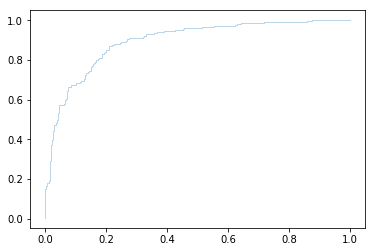

Area under Curve ROC: Log Regression - 0.896273


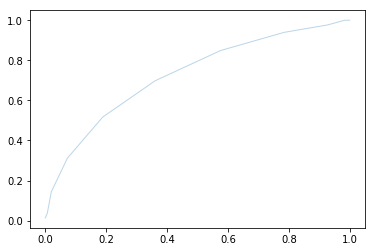

Area under Curve ROC: Random Forest - 0.727705


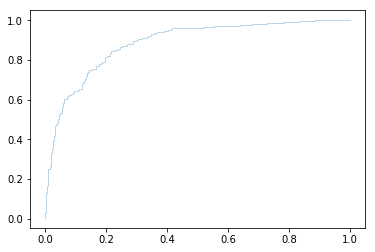

Area under Curve ROC: Naive Bayes - 0.887317


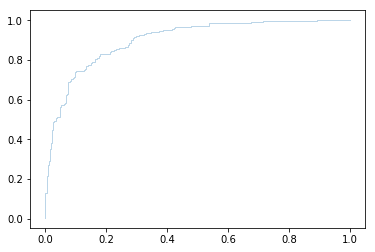

Area under Curve ROC: SVM - 0.902740


,Classifier,ROC_AUC
0,Log Regression,0.896273
1,Random Forest,0.727705
2,Naive Bayes,0.887317
3,SVM,0.902740


In [44]:
# Import the libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

# Define functions for building model, making predictions and evaluation

def train_classifier(classifier, train_docs, train_labels):
    classifier.fit(train_docs, train_labels)
    return classifier


def make_predictions(classifier,train_docs,train_labels,test_docs):
    model = train_classifier(classifier,train_docs, train_labels)
    predictions = model.predict(test_docs)
    predictions_prob = model.predict_proba(test_docs)
    return(predictions,predictions_prob)

def evaluate(test_labels, predictions,predictions_prob):
    fpr, tpr, thresholds = roc_curve(test_labels, predictions_prob[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC (AUC = %0.2f)' % (roc_auc))
    plt.show()
    return(roc_auc)

# Set seed

seed = 10

# Prepare models

models = []
models.append(('Log Regression', LogisticRegression(random_state=seed)))
models.append(('Random Forest', RandomForestClassifier(random_state=seed)))
models.append(('Naive Bayes', MultinomialNB()))
models.append(('SVM', SVC(kernel='linear',random_state=seed,probability=True)))

# Define variables to hold results

results = []
names = []
results_dict = {'ROC_AUC': [], 'Classifier': [] }

# Evaluate each model in turn

for name, model in models:
    clf = model
    predictions,predictions_prob = make_predictions(clf, train_docs, train_labels, test_docs)
    roc = evaluate(test_labels, predictions,predictions_prob)
    results.append(roc)
    names.append(name)
    results_roc = "Area under Curve ROC: " + "%s - %f" % (name, roc)
    results_dict['Classifier'].append(name)
    results_dict['ROC_AUC'].append(roc)
    print(results_roc)
    
df = pd.DataFrame(data=results_dict)
df